# Visualising timeseries

Here we're looking at a couple of ways to visualize data that vary with time. This notebook accompanies the [DataTree course](https://datatree.org.uk), [module 5, Visualization](https://datatree.org.uk/course/view.php?id=5).

## Example data

We're going to use a real dataset here as our example. [HadCRUT4](https://www.metoffice.gov.uk/hadobs/hadcrut4/) is a "dataset of global historical surface temperature anomalies relative to a 1961-1990 reference period". For more details, see the [HadCRUT4 website](https://www.metoffice.gov.uk/hadobs/hadcrut4/) and [this journal paper](http://dx.doi.org/10.1029/2011JD017187).

HadCRUT4 can be used freely for the purposes of private study and scientific research; however, we are not able to redistribute it with this course. Therefore you will have to go to the HadCRUT4 website and download the data for yourself:

 - Go to the HadCRUT4 website and navigate to the download page.
 - The dataset is available in lots of different forms. Look for "HadCRUT4 time series: ensemble medians and uncertainties", which, at the time of writing, is near the top of the page.
 - Download the file for the Northern Hemisphere with monthly values.
 
You should end up with a file called something like "HadCRUT.4.6.0.0.monthly_nh.txt". You may find that the version number is slightly different in your file.

First we're going to load the data, which are presented in a text format. The full details of the format can be found from the data download page, but here are the essential points:

 * The file consists of twelve columns, separated by spaces
 * There are no column headers
 * The first column is the date in yyyy/mm format
 * The second column is the "best estimate" temperature anomaly for that month, computed as the median of 100 ensemble members
 * The eleventh and twelfth columns are the lower and upper bounds of the total 95% uncertainty range
 * We don't need the other ten columns
 
In general, reading text files such as this can be a little tricky because of a number of factors including column separators, character encodings and newlines. The [Pandas](http://pandas.pydata.org) library for Python helps enormously here, and we'll use it in this example.

## Reading the data

In [1]:
# Some standard imports
import pandas as pd

# Read the data
df = pd.read_csv('HadCRUT.4.6.0.0.monthly_nh.txt',
                 delim_whitespace = True,                       # Columns are delimited by whitespace
                 index_col = 0,                                 # First column is our "index", i.e. the unique row label
                 usecols = [0,1,10,11],                         # We only need some of the columns
                 names = ['date', 'tanom', 'lbound', 'ubound'], # We add our own column names
                 parse_dates = [0],                             # Dates are in the first column... 
                 date_parser = lambda d: pd.to_datetime(d, format='%Y/%m'))  # ... in the format year/month

Now we have read the dataset into a structure called a "dataframe", which is a very useful structure for keeping data and metadata together. Let's just check that this looks sensible by printing out the first few lines of the data:

In [2]:
df[:5]
# You can also use "df.head(5)"

,tanom,lbound,ubound
date,,,
1850-01-01,-0.844,-1.413,-0.274
1850-02-01,-0.053,-0.661,0.556
1850-03-01,-0.699,-1.174,-0.229
1850-04-01,-0.586,-0.992,-0.178
1850-05-01,-0.420,-0.750,-0.101


## A first plot

Now that we seem to have read the data in correctly, let's make a simple plot, using Pandas' built-in plot functions.

Text(0,0.5,'temperature anomaly (degrees Celsius)')

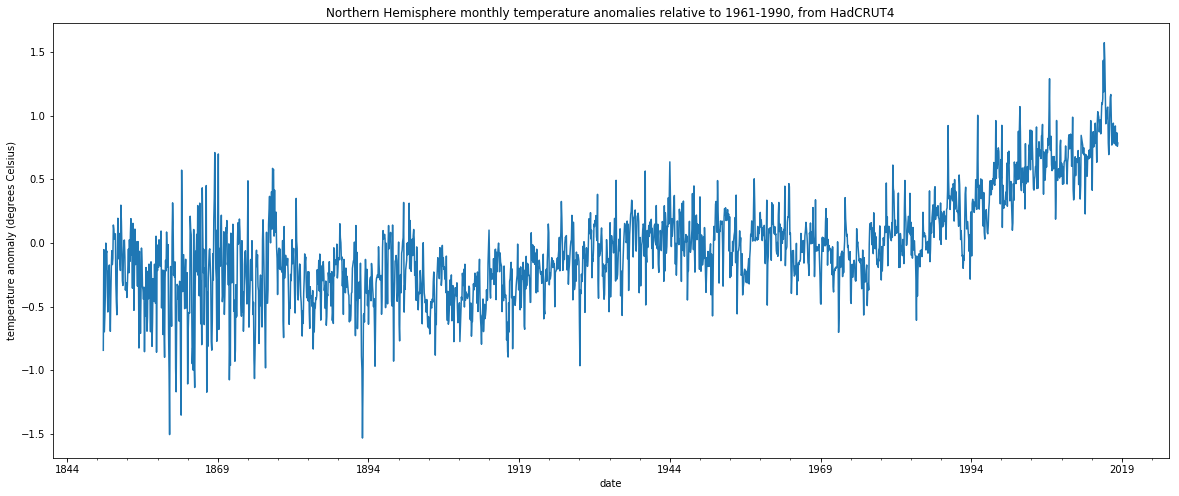

In [3]:
# Render our plots inline
%matplotlib inline
# Import Matplotlib
import matplotlib.pyplot as plt
# Set a sensible figure size
plt.figure(figsize=(20,8))

# Make the plot of the temperature anomaly data
ax = df['tanom'].plot(title='Northern Hemisphere monthly temperature anomalies relative to 1961-1990, from HadCRUT4')
ax.set_ylabel('temperature anomaly (degrees Celsius)')

This plot is fine as a first look, and gives a good general impression of the data. However, we can't pick out much of the fine detail, and we're not including any information about uncertainty bounds.

## Including uncertainties

Where possible, we should always include information about uncertainties in scientific plots. Unfortunately, Python plotting libraries are rather variable in their support for this. As far as I can tell, the built-in Pandas plotting function does not include this facility in the way we need it, so for our next plot we will use Matplotlib plotting functions directly.

If we try to include error bars for every point in the above plot, we would not get a very comprehensible result, as the data are too dense. Therefore, in our next plot, we will include only the dates from the year 2000 onwards.

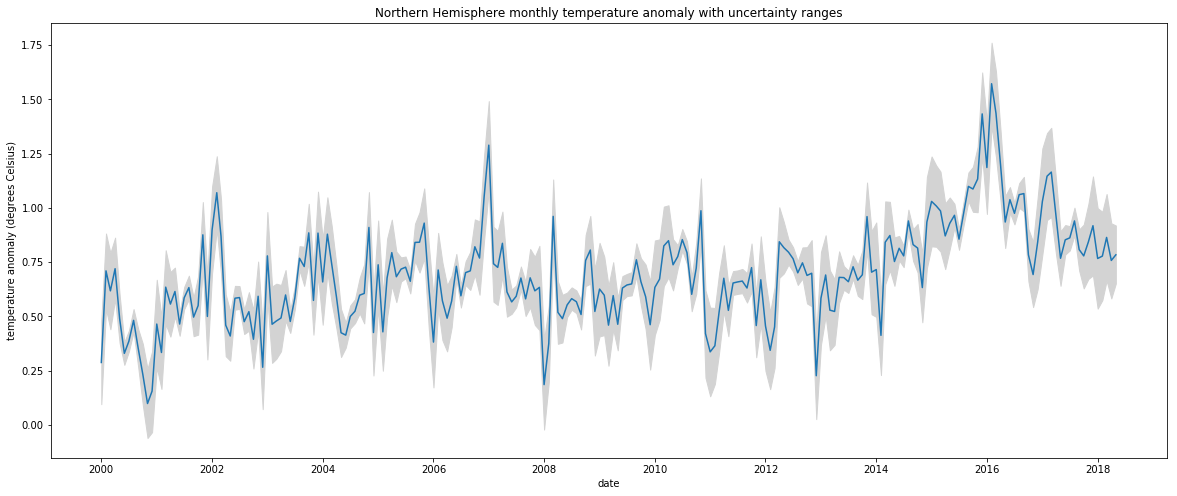

In [4]:
plt.figure(figsize=(20,8))
plt.xlabel('date')
plt.ylabel('temperature anomaly (degrees Celsius)')
plt.title('Northern Hemisphere monthly temperature anomaly with uncertainty ranges')
# Create a subset of the data by filtering out all data points earlier than the year 2000.
# Note that the date column is the 'index' of the dataframe
subset = df[df.index >= pd.to_datetime('2000-01-01')]
# (You can also subset by index, e.g. subset = df[1800:])
plt.plot(subset['tanom'])

# Fill between the lower and upper uncertainty bound in light grey
plt.fill_between(subset.index, subset['lbound'], subset['ubound'], color='lightgrey')

We can see that, when faced with a dense timeseries like this, it's very hard to create a single plot that captures all the information we would like. We can show the entire timeseries, in which case it's hard to see the internal variability, or we can "zoom in", in which case it's hard to see the overall trend. Is there a way to see both of these in the same plot?


## Timeseries "heatmap"

If we use *two* axes of time, we can encode temperature anomalies as colours. In this way, we can separate out the variation *within a year* from the variation *from one year to the next* and see both of them within the same plot. Here we're going to construct a plot that includes the year on the x axis and the month on the y axis, encoding the temperature data as colours.

First we have to separate out the year and month into new columns. It's quite easy to add new columns to a pandas dataframe, but the code to extract the month and year from the date information is a little trickier. There are many ways to do this, but the code below is quite concise and efficient. Don't worry if you don't quite understand how this works. (Note that the date is contained in the *index* of the pandas dataframe.)

In [5]:
# Extract the year and add it to a new column
df['year'] = df.index.map(lambda d: d.year)
# Extract the month and add it to a new column
df['month'] = df.index.map(lambda d: d.month)

Let's check that we have done this correctly by printing out the first few lines of our new dataframe:

In [6]:
df[:5]

,tanom,lbound,ubound,year,month
date,,,,,
1850-01-01,-0.844,-1.413,-0.274,1850,1
1850-02-01,-0.053,-0.661,0.556,1850,2
1850-03-01,-0.699,-1.174,-0.229,1850,3
1850-04-01,-0.586,-0.992,-0.178,1850,4
1850-05-01,-0.420,-0.750,-0.101,1850,5


Looks good. Now we can plot temperature anomalies as a function of year and month. The [Seaborn](https://seaborn.pydata.org) library contains a very useful function to do this. (Seaborn builds on top of Matplotlib to give some extra functionality.)

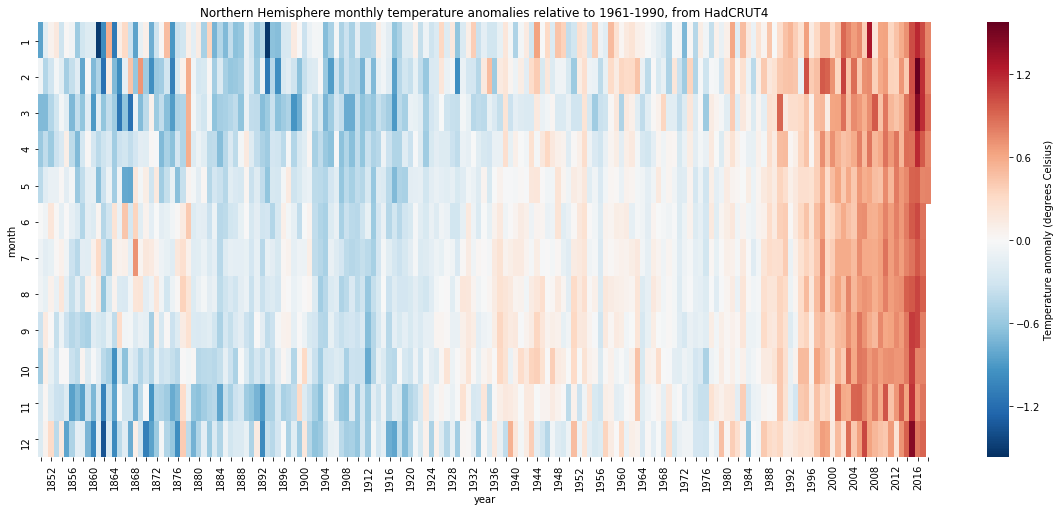

In [7]:
import seaborn as sns

# Here we are extracting the data we need from the Pandas dataframe
heatmap_data = df.pivot(index='month', columns='year', values='tanom')

# We need to centre the colour scale properly, so we'll need to find 
# the minimum and maximum values of the temperature anomaly data
datamin = df['tanom'].min()
datamax = df['tanom'].max()
# Which one of these has the bigger absolute value? We need this to centre the colour scale properly
absmax = max(abs(datamin), abs(datamax))

plt.figure(figsize=(20,8))
plt.title("Northern Hemisphere monthly temperature anomalies relative to 1961-1990, from HadCRUT4")
# Use a diverging colour scale as it is suitable for anomalies.
ax = sns.heatmap(heatmap_data, vmin=-absmax, vmax=absmax, cmap='RdBu_r',
            cbar_kws={'label': 'Temperature anomaly (degrees Celsius)'}) 

# Axis labels can look cramped, so let's hide every alternate one
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

Now we can see both variation within a year, and from one year to the next, in a single plot. This is a very useful kind of visualization that can help us to answer questions like finding anomalous months and looking at patterns in winter versus the summer.

(Note that if we had used the global dataset from HadCRUT4, we would not expect to see as much variation between seasons. Therefore we chose the Northern Hemisphere dataset to emphasise these.)

However, we're still not including all the information we have here - what is missing?

## A note on colour scales
We have seen elsewhere in this course the importance of choosing a suitable colour scale. Please note the following about the scale we have chosen here:

 - This is a *diverging* scale, which deliberately uses different colours for warm (red) and cold (blue) anomalies. The colour white has a special meaning (zero anomaly).
 - Each half of the colour scale is *perceptually linear*, i.e. gets darker gradually, without any breaks or sharp gradients in colour.
 - The scale is *symmetrical*, so that absolute values of equal magnitude appear equally dark, whether they are positive or negative.

Have a look at the [Matplotlib website](https://matplotlib.org/users/colormaps.html) for more details on the available colour scale. Note that the colour scale with the name "RdBu" goes from red to blue, but we wanted this to be reversed; therefore, following Matplotlib conventions, we used the name "RdBu_r".